# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

### Real World Data

In [27]:
import pandas as pd
import numpy as np

In [28]:
raw = pd.read_csv('tw_stock_portfolio.csv',
                 index_col=0, parse_dates=True).dropna()

In [29]:
symbols = ['tw2317', 'tw1313', 'tw2603', 'tw1201', 'tw2812']

In [30]:
data = raw[symbols]
data = data.dropna()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3046 entries, 2010-01-04 to 2022-06-09
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tw2317  3046 non-null   float64
 1   tw1313  3046 non-null   float64
 2   tw2603  3046 non-null   float64
 3   tw1201  3046 non-null   float64
 4   tw2812  3046 non-null   float64
dtypes: float64(5)
memory usage: 142.8 KB


In [32]:
data.head()

,tw2317,tw1313,tw2603,tw1201,tw2812
Date,,,,,
2010-01-04,98.203407,14.255147,15.202733,42.950001,5.289731
2010-01-05,98.851616,13.974059,15.747183,43.000000,5.454244
2010-01-06,98.203407,14.255147,15.495899,43.000000,5.587121
2010-01-07,97.231094,14.737011,15.579660,42.900002,5.574466
2010-01-08,97.555199,15.098409,16.417276,42.500000,5.612430


<AxesSubplot:xlabel='Date'>

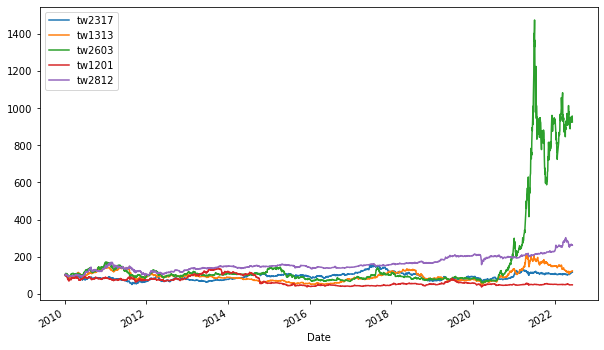

In [33]:
(data / data.iloc[0] * 100).plot(figsize=(10, 6))
# plt.savefig('../../images/ch13/stat_07.png');

In [34]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,tw2317,tw1313,tw2603,tw1201,tw2812
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.006579,-0.019915,0.035186,0.001163,0.030627
2010-01-06,-0.006579,0.019915,-0.016086,0.000000,0.024070
2010-01-07,-0.009950,0.033244,0.005391,-0.002328,-0.002268
2010-01-08,0.003328,0.024227,0.052368,-0.009368,0.006787


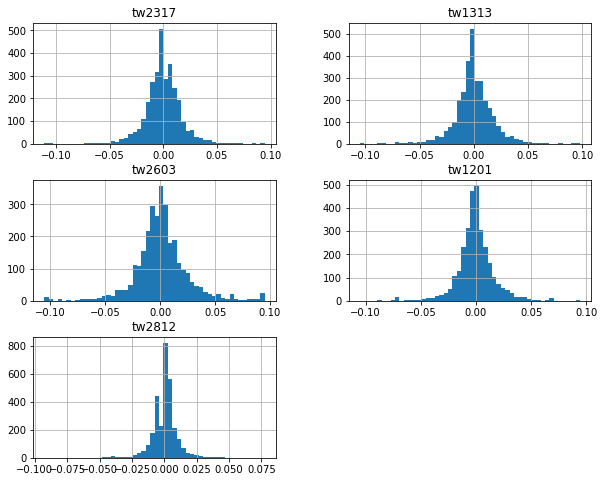

In [35]:
log_returns.hist(bins=50, figsize=(10, 8));
# plt.savefig('../../images/ch13/stat_08.png');

## Portfolio Optimization

### The Data

In [37]:
symbols = ['tw2317', 'tw1313', 'tw2603', 'tw1201', 'tw2812'] 

In [38]:
noa = len(symbols)  

In [39]:
data = raw[symbols]

In [40]:
rets = np.log(data / data.shift(1))

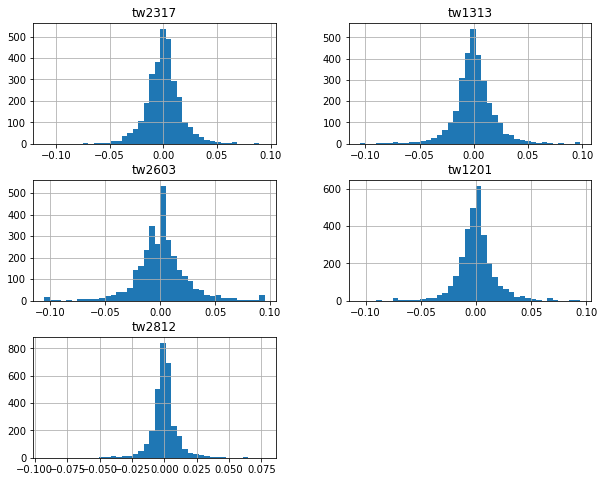

In [41]:
rets.hist(bins=40, figsize=(10, 8));
# plt.savefig('../../images/ch13/stat_11.png')

In [42]:
rets.mean() * 252  

tw2317    0.013067
tw1313    0.017679
tw2603    0.184033
tw1201   -0.059610
tw2812    0.079657
dtype: float64

In [43]:
rets.cov() * 252  

,tw2317,tw1313,tw2603,tw1201,tw2812
tw2317,0.067178,0.022007,0.028234,0.017492,0.016579
tw1313,0.022007,0.086537,0.039054,0.025262,0.020067
tw2603,0.028234,0.039054,0.156350,0.023902,0.020838
tw1201,0.017492,0.025262,0.023902,0.079204,0.016404
tw2812,0.016579,0.020067,0.020838,0.016404,0.029977


### The Basic Theory

In [44]:
weights = np.random.random(noa)  
weights /= np.sum(weights)  

In [45]:
weights

array([0.07130262, 0.18688151, 0.06070051, 0.39021061, 0.29090475])

In [46]:
weights.sum()

0.9999999999999999

In [47]:
np.sum(rets.mean() * weights) * 252  

0.0153184654958168

In [48]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))  

0.03337316269196178

In [49]:
import math
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))  

0.18268323046180723

In [50]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [51]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [52]:
#此段程式碼 就是在做蒙地卡羅模擬法的運算
prets = []
pvols = []
for p in range (2500):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)

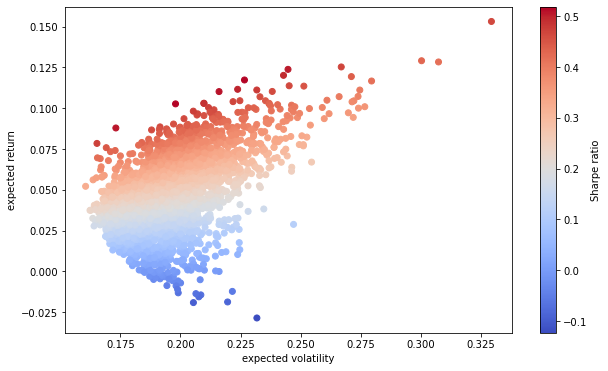

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');
# plt.savefig('../../images/ch13/stat_12.png')

五檔個股來自於：
電子股：鴻海 (2317)
石化股：聯成 (1313)
航運股：長榮 (2603)
食品股：味全 (1201)
金融股：台中銀 (2812)